# Cleaning Data

## Load Data

```python

In [2]:
!pip install missingno

In [3]:
import matplotlib.pyplot as plt
import missingno as mn
import numpy as np
import pandas as pd

import io
import urllib.request as req
import zipfile

In [4]:
# https://www.kaggle.com/kaggle/kaggle-survey-2018
url = 'https://github.com/mattharrison/datasets/raw/master/data/kaggle-survey-2018.zip'
fin = req.urlopen(url)

with zipfile.ZipFile(io.BytesIO(fin.read())) as z:
    print(z.namelist())
    kag = pd.read_csv(z.open('multipleChoiceResponses.csv'))
    kag_questions = kag.iloc[0]
    df = kag.iloc[1:]

['multipleChoiceResponses.csv', 'freeFormResponses.csv', 'SurveySchema.csv']


/var/folders/qn/r8_0pgj1645dn1w69vqls6cw0000gn/T/ipykernel_54972/1360795726.py:7: DtypeWarning: Columns (0,2,8,10,21,23,24,25,26,27,28,42,44,54,56,64,81,83,85,87,105,107,109,121,123,125,148,150,157,172,174,192,194,210,218,219,221,223,246,247,249,262,264,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,302,304,306,325,326,329,341,368,371,384,385,389,390,391,393,394) have mixed types. Specify dtype option on import or set low_memory=False.
  kag = pd.read_csv(z.open('multipleChoiceResponses.csv'))


In [5]:
df

,Time from Start to Finish (seconds),Q1,Q1_OTHER_TEXT,Q2,Q3,Q4,Q5,Q6,Q6_OTHER_TEXT,Q7,...,Q49_OTHER_TEXT,Q50_Part_1,Q50_Part_2,Q50_Part_3,Q50_Part_4,Q50_Part_5,Q50_Part_6,Q50_Part_7,Q50_Part_8,Q50_OTHER_TEXT
1,710,Female,-1,45-49,United States of America,Doctoral degree,Other,Consultant,-1,Other,...,-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1
2,434,Male,-1,30-34,Indonesia,Bachelor’s degree,Engineering (non-computer focused),Other,0,Manufacturing/Fabrication,...,-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1
3,718,Female,-1,30-34,United States of America,Master’s degree,"Computer science (software engineering, etc.)",Data Scientist,-1,I am a student,...,-1,NaN,Too time-consuming,NaN,NaN,NaN,NaN,NaN,NaN,-1
4,621,Male,-1,35-39,United States of America,Master’s degree,"Social sciences (anthropology, psychology, soc...",Not employed,-1,NaN,...,-1,NaN,NaN,Requires too much technical knowledge,NaN,Not enough incentives to share my work,NaN,NaN,NaN,-1
5,731,Male,-1,22-24,India,Master’s degree,Mathematics or statistics,Data Analyst,-1,I am a student,...,-1,NaN,Too time-consuming,NaN,NaN,Not enough incentives to share my work,NaN,NaN,NaN,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23855,575,Male,-1,45-49,France,Doctoral degree,"Computer science (software engineering, etc.)",Chief Officer,-1,Computers/Technology,...,-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1
23856,131,Female,-1,25-29,Turkey,Master’s degree,Engineering (non-computer focused),NaN,-1,NaN,...,-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1
23857,370,Male,-1,22-24,Turkey,Master’s degree,"Computer science (software engineering, etc.)",Software Engineer,-1,Computers/Technology,...,-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1
23858,36,Male,-1,25-29,United Kingdom of Great Britain and Northern I...,NaN,NaN,NaN,-1,NaN,...,-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1


In [7]:
df.columns

Index(['Time from Start to Finish (seconds)', 'Q1', 'Q1_OTHER_TEXT', 'Q2',
       'Q3', 'Q4', 'Q5', 'Q6', 'Q6_OTHER_TEXT', 'Q7',
       ...
       'Q49_OTHER_TEXT', 'Q50_Part_1', 'Q50_Part_2', 'Q50_Part_3',
       'Q50_Part_4', 'Q50_Part_5', 'Q50_Part_6', 'Q50_Part_7', 'Q50_Part_8',
       'Q50_OTHER_TEXT'],
      dtype='object', length=395)

In [8]:
df.dtypes

Time from Start to Finish (seconds)    object
Q1                                     object
Q1_OTHER_TEXT                          object
Q2                                     object
Q3                                     object
                                        ...  
Q50_Part_5                             object
Q50_Part_6                             object
Q50_Part_7                             object
Q50_Part_8                             object
Q50_OTHER_TEXT                         object
Length: 395, dtype: object

## Missing Values

In [9]:
# Missing values
df.isna()

,Time from Start to Finish (seconds),Q1,Q1_OTHER_TEXT,Q2,Q3,Q4,Q5,Q6,Q6_OTHER_TEXT,Q7,...,Q49_OTHER_TEXT,Q50_Part_1,Q50_Part_2,Q50_Part_3,Q50_Part_4,Q50_Part_5,Q50_Part_6,Q50_Part_7,Q50_Part_8,Q50_OTHER_TEXT
1,False,False,False,False,False,False,False,False,False,False,...,False,True,True,True,True,True,True,True,True,False
2,False,False,False,False,False,False,False,False,False,False,...,False,True,True,True,True,True,True,True,True,False
3,False,False,False,False,False,False,False,False,False,False,...,False,True,False,True,True,True,True,True,True,False
4,False,False,False,False,False,False,False,False,False,True,...,False,True,True,False,True,False,True,True,True,False
5,False,False,False,False,False,False,False,False,False,False,...,False,True,False,True,True,False,True,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23855,False,False,False,False,False,False,False,False,False,False,...,False,True,True,True,True,True,True,True,True,False
23856,False,False,False,False,False,False,False,True,False,True,...,False,True,True,True,True,True,True,True,True,False
23857,False,False,False,False,False,False,False,False,False,False,...,False,True,True,True,True,True,True,True,True,False
23858,False,False,False,False,False,True,True,True,False,True,...,False,True,True,True,True,True,True,True,True,False


In [10]:
df.isna().sum()

Time from Start to Finish (seconds)        0
Q1                                         0
Q1_OTHER_TEXT                              0
Q2                                         0
Q3                                         0
                                       ...  
Q50_Part_5                             20290
Q50_Part_6                             22800
Q50_Part_7                             21359
Q50_Part_8                             23339
Q50_OTHER_TEXT                             0
Length: 395, dtype: int64

In [11]:
df.isna().mean() * 100

Time from Start to Finish (seconds)     0.000000
Q1                                      0.000000
Q1_OTHER_TEXT                           0.000000
Q2                                      0.000000
Q3                                      0.000000
                                         ...    
Q50_Part_5                             85.041284
Q50_Part_6                             95.561423
Q50_Part_7                             89.521774
Q50_Part_8                             97.820529
Q50_OTHER_TEXT                          0.000000
Length: 395, dtype: float64

<AxesSubplot: >

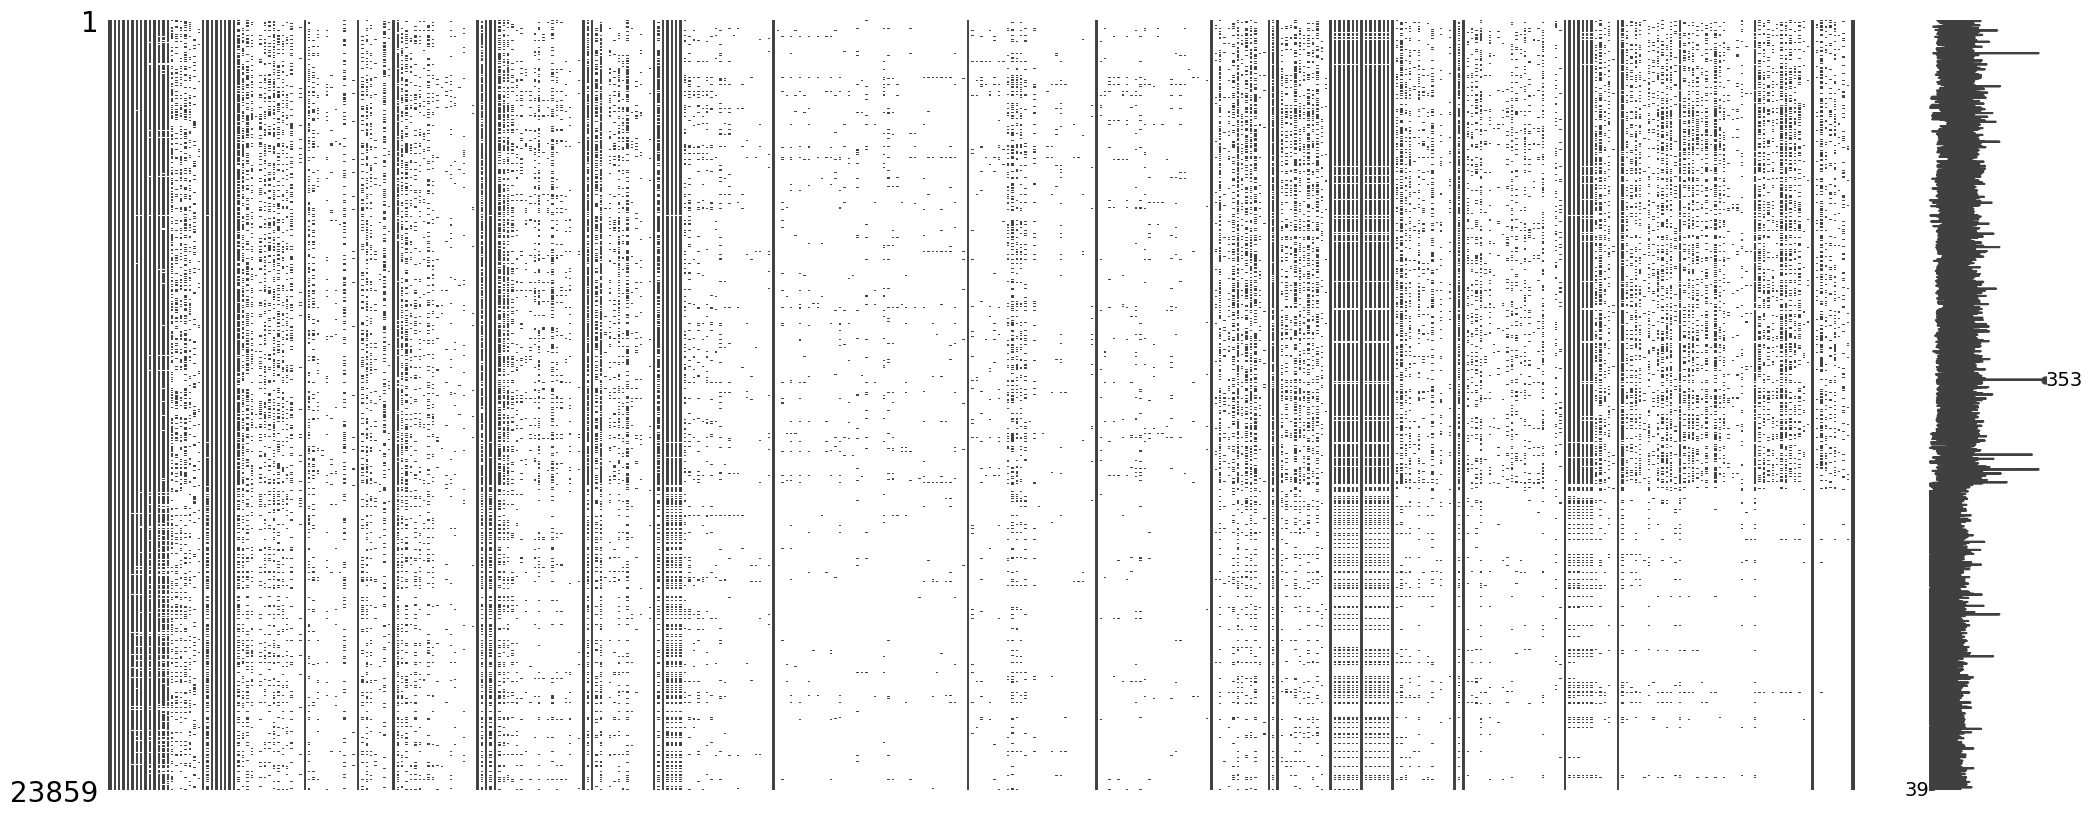

In [12]:
mn.matrix(df)

<AxesSubplot: >

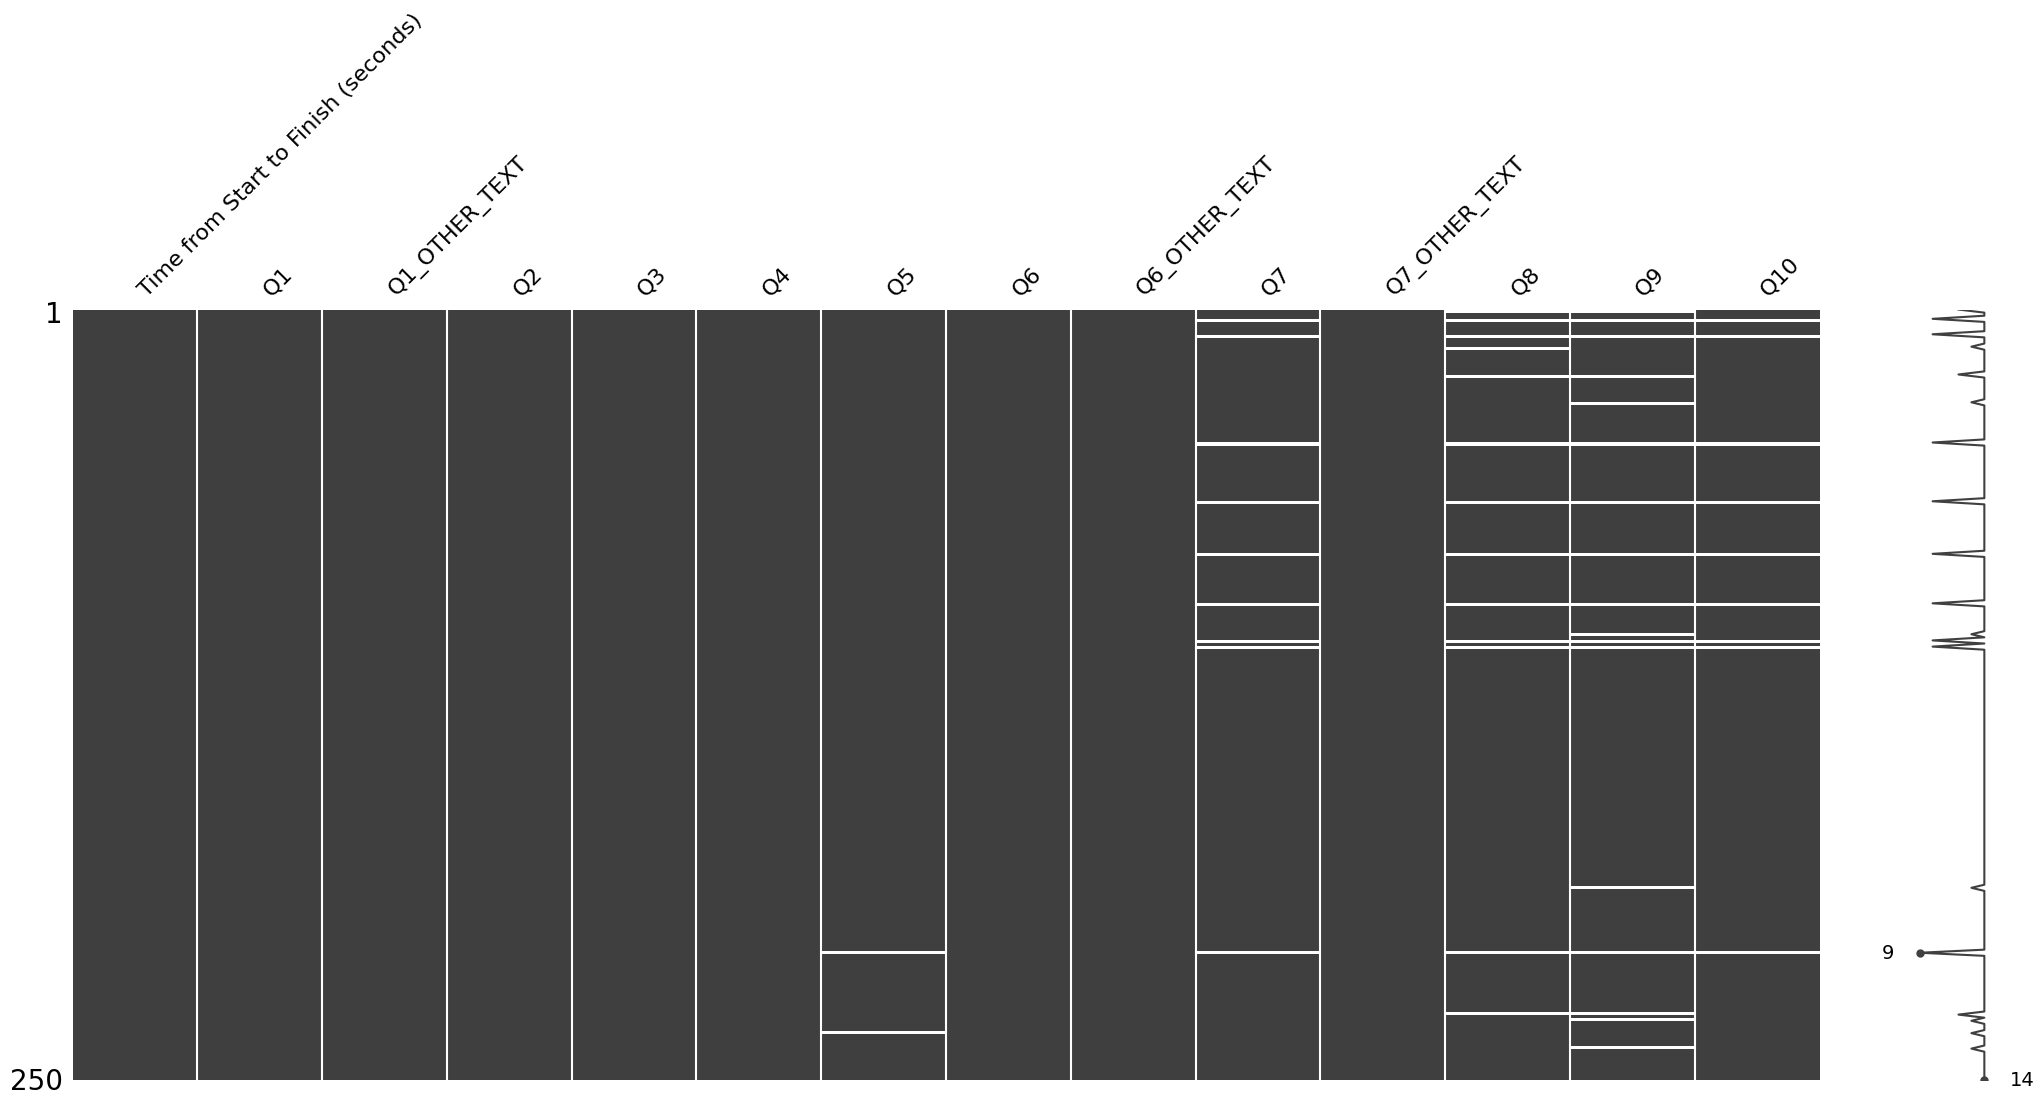

In [13]:
mn.matrix(df.iloc[:250,:14])

In [ ]:
# options for missing values
# .dropna()
# .fillna(val)
# .col.interpolate()  [For numeric]

## Q1 - Sex

In [14]:
# use .value_counts to inspect object type data
df.Q1.value_counts(dropna=False)

Q1
Male                       19430
Female                      4010
Prefer not to say            340
Prefer to self-describe       79
Name: count, dtype: int64

In [15]:
df.Q1.replace({'Prefer not to say': 'Other',
               'Prefer to self-describe': 'Other'}).value_counts()

Q1
Male      19430
Female     4010
Other       419
Name: count, dtype: int64

In [17]:
# Might use get_dummies when applying ML (or use OneHotEncoder from sklearn)
pd.get_dummies((df.Q1
  .replace({'Prefer not to say': 'Another',
               'Prefer to self-describe': 'Another'})
), drop_first=True)

,Female,Male
1,True,False
2,False,True
3,True,False
4,False,True
5,False,True
...,...,...
23855,False,True
23856,True,False
23857,False,True
23858,False,True


In [18]:
(df
 .assign(**pd.get_dummies(df.Q1
    .replace({'Prefer not to say': 'Another',
                'Prefer to self-describe': 'Another'})
    , drop_first=True))
)

,Time from Start to Finish (seconds),Q1,Q1_OTHER_TEXT,Q2,Q3,Q4,Q5,Q6,Q6_OTHER_TEXT,Q7,...,Q50_Part_2,Q50_Part_3,Q50_Part_4,Q50_Part_5,Q50_Part_6,Q50_Part_7,Q50_Part_8,Q50_OTHER_TEXT,Female,Male
1,710,Female,-1,45-49,United States of America,Doctoral degree,Other,Consultant,-1,Other,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1,True,False
2,434,Male,-1,30-34,Indonesia,Bachelor’s degree,Engineering (non-computer focused),Other,0,Manufacturing/Fabrication,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1,False,True
3,718,Female,-1,30-34,United States of America,Master’s degree,"Computer science (software engineering, etc.)",Data Scientist,-1,I am a student,...,Too time-consuming,NaN,NaN,NaN,NaN,NaN,NaN,-1,True,False
4,621,Male,-1,35-39,United States of America,Master’s degree,"Social sciences (anthropology, psychology, soc...",Not employed,-1,NaN,...,NaN,Requires too much technical knowledge,NaN,Not enough incentives to share my work,NaN,NaN,NaN,-1,False,True
5,731,Male,-1,22-24,India,Master’s degree,Mathematics or statistics,Data Analyst,-1,I am a student,...,Too time-consuming,NaN,NaN,Not enough incentives to share my work,NaN,NaN,NaN,-1,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23855,575,Male,-1,45-49,France,Doctoral degree,"Computer science (software engineering, etc.)",Chief Officer,-1,Computers/Technology,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1,False,True
23856,131,Female,-1,25-29,Turkey,Master’s degree,Engineering (non-computer focused),NaN,-1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1,True,False
23857,370,Male,-1,22-24,Turkey,Master’s degree,"Computer science (software engineering, etc.)",Software Engineer,-1,Computers/Technology,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1,False,True
23858,36,Male,-1,25-29,United Kingdom of Great Britain and Northern I...,NaN,NaN,NaN,-1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1,False,True


In [19]:
(df
 .assign(sex=df.Q1.replace({'Prefer not to say': 'Another',
                            'Prefer to self-describe': 'Another'}).astype('category'))
 )

,Time from Start to Finish (seconds),Q1,Q1_OTHER_TEXT,Q2,Q3,Q4,Q5,Q6,Q6_OTHER_TEXT,Q7,...,Q50_Part_1,Q50_Part_2,Q50_Part_3,Q50_Part_4,Q50_Part_5,Q50_Part_6,Q50_Part_7,Q50_Part_8,Q50_OTHER_TEXT,sex
1,710,Female,-1,45-49,United States of America,Doctoral degree,Other,Consultant,-1,Other,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1,Female
2,434,Male,-1,30-34,Indonesia,Bachelor’s degree,Engineering (non-computer focused),Other,0,Manufacturing/Fabrication,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1,Male
3,718,Female,-1,30-34,United States of America,Master’s degree,"Computer science (software engineering, etc.)",Data Scientist,-1,I am a student,...,NaN,Too time-consuming,NaN,NaN,NaN,NaN,NaN,NaN,-1,Female
4,621,Male,-1,35-39,United States of America,Master’s degree,"Social sciences (anthropology, psychology, soc...",Not employed,-1,NaN,...,NaN,NaN,Requires too much technical knowledge,NaN,Not enough incentives to share my work,NaN,NaN,NaN,-1,Male
5,731,Male,-1,22-24,India,Master’s degree,Mathematics or statistics,Data Analyst,-1,I am a student,...,NaN,Too time-consuming,NaN,NaN,Not enough incentives to share my work,NaN,NaN,NaN,-1,Male
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23855,575,Male,-1,45-49,France,Doctoral degree,"Computer science (software engineering, etc.)",Chief Officer,-1,Computers/Technology,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1,Male
23856,131,Female,-1,25-29,Turkey,Master’s degree,Engineering (non-computer focused),NaN,-1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1,Female
23857,370,Male,-1,22-24,Turkey,Master’s degree,"Computer science (software engineering, etc.)",Software Engineer,-1,Computers/Technology,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1,Male
23858,36,Male,-1,25-29,United Kingdom of Great Britain and Northern I...,NaN,NaN,NaN,-1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1,Male


## Q2 - Age

In [20]:
(df
 .assign(sex=df.Q1.replace({'Prefer not to say': 'Another',
                            'Prefer to self-describe': 'Another'}).astype('category'))
 .Q2                            
 )

1        45-49
2        30-34
3        30-34
4        35-39
5        22-24
         ...  
23855    45-49
23856    25-29
23857    22-24
23858    25-29
23859    25-29
Name: Q2, Length: 23859, dtype: object

In [21]:
(df
 .assign(sex=df.Q1.replace({'Prefer not to say': 'Another',
                            'Prefer to self-describe': 'Another'}).astype('category'))
 .Q2
 .value_counts(dropna=False)                            
 )

Q2
25-29    6159
22-24    5141
30-34    3776
18-21    3037
35-39    2253
40-44    1360
45-49     858
50-54     582
55-59     328
60-69     273
70-79      53
80+        39
Name: count, dtype: int64

In [22]:
(df
 .assign(sex=df.Q1.replace({'Prefer not to say': 'Another',
                            'Prefer to self-describe': 'Another'}).astype('category'))
 .Q2
 .str.slice(0,2)
 )

1        45
2        30
3        30
4        35
5        22
         ..
23855    45
23856    25
23857    22
23858    25
23859    25
Name: Q2, Length: 23859, dtype: object

In [23]:
(df
 .assign(sex=df.Q1.replace({'Prefer not to say': 'Another',
                            'Prefer to self-describe': 'Another'}).astype('category'),
    age=df.Q2.str.slice(0,2).astype('int8'))
 )

,Time from Start to Finish (seconds),Q1,Q1_OTHER_TEXT,Q2,Q3,Q4,Q5,Q6,Q6_OTHER_TEXT,Q7,...,Q50_Part_2,Q50_Part_3,Q50_Part_4,Q50_Part_5,Q50_Part_6,Q50_Part_7,Q50_Part_8,Q50_OTHER_TEXT,sex,age
1,710,Female,-1,45-49,United States of America,Doctoral degree,Other,Consultant,-1,Other,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1,Female,45
2,434,Male,-1,30-34,Indonesia,Bachelor’s degree,Engineering (non-computer focused),Other,0,Manufacturing/Fabrication,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1,Male,30
3,718,Female,-1,30-34,United States of America,Master’s degree,"Computer science (software engineering, etc.)",Data Scientist,-1,I am a student,...,Too time-consuming,NaN,NaN,NaN,NaN,NaN,NaN,-1,Female,30
4,621,Male,-1,35-39,United States of America,Master’s degree,"Social sciences (anthropology, psychology, soc...",Not employed,-1,NaN,...,NaN,Requires too much technical knowledge,NaN,Not enough incentives to share my work,NaN,NaN,NaN,-1,Male,35
5,731,Male,-1,22-24,India,Master’s degree,Mathematics or statistics,Data Analyst,-1,I am a student,...,Too time-consuming,NaN,NaN,Not enough incentives to share my work,NaN,NaN,NaN,-1,Male,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23855,575,Male,-1,45-49,France,Doctoral degree,"Computer science (software engineering, etc.)",Chief Officer,-1,Computers/Technology,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1,Male,45
23856,131,Female,-1,25-29,Turkey,Master’s degree,Engineering (non-computer focused),NaN,-1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1,Female,25
23857,370,Male,-1,22-24,Turkey,Master’s degree,"Computer science (software engineering, etc.)",Software Engineer,-1,Computers/Technology,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1,Male,22
23858,36,Male,-1,25-29,United Kingdom of Great Britain and Northern I...,NaN,NaN,NaN,-1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1,Male,25


## Q3 - Country

In [24]:
(df
 .assign(sex=df.Q1.replace({'Prefer not to say': 'Another',
                            'Prefer to self-describe': 'Another'}).astype('category'),
    age=df.Q2.str.slice(0,2).astype('int8'))
 .Q3.value_counts(dropna=False)
 )

Q3
United States of America                                4716
India                                                   4417
China                                                   1644
Other                                                   1036
Russia                                                   879
Brazil                                                   736
Germany                                                  734
United Kingdom of Great Britain and Northern Ireland     702
Canada                                                   604
France                                                   604
Japan                                                    597
Spain                                                    485
I do not wish to disclose my location                    394
Italy                                                    355
Australia                                                330
Turkey                                                   327
Poland               

In [25]:
def limit_countries(val):
    if val in  {'United States of America', 'India', 'China'}:
        return val
    return 'Another'

(df
 .assign(sex=df.Q1.replace({'Prefer not to say': 'Another',
                            'Prefer to self-describe': 'Another'}).astype('category'),
    age=df.Q2.str.slice(0,2).astype('int8'))
 .Q3.apply(limit_countries)
 )

1        United States of America
2                         Another
3        United States of America
4        United States of America
5                           India
                   ...           
23855                     Another
23856                     Another
23857                     Another
23858                     Another
23859                     Another
Name: Q3, Length: 23859, dtype: object

In [26]:
def limit_countries(val):
    if val in  {'United States of America', 'India', 'China'}:
        return val
    return 'Another'

(df
 .assign(sex=df.Q1.replace({'Prefer not to say': 'Another',
                            'Prefer to self-describe': 'Another'}).astype('category'),
    age=df.Q2.str.slice(0,2).astype('int8'),
    country=df.Q3.apply(limit_countries).astype('category'))
 )

,Time from Start to Finish (seconds),Q1,Q1_OTHER_TEXT,Q2,Q3,Q4,Q5,Q6,Q6_OTHER_TEXT,Q7,...,Q50_Part_3,Q50_Part_4,Q50_Part_5,Q50_Part_6,Q50_Part_7,Q50_Part_8,Q50_OTHER_TEXT,sex,age,country
1,710,Female,-1,45-49,United States of America,Doctoral degree,Other,Consultant,-1,Other,...,NaN,NaN,NaN,NaN,NaN,NaN,-1,Female,45,United States of America
2,434,Male,-1,30-34,Indonesia,Bachelor’s degree,Engineering (non-computer focused),Other,0,Manufacturing/Fabrication,...,NaN,NaN,NaN,NaN,NaN,NaN,-1,Male,30,Another
3,718,Female,-1,30-34,United States of America,Master’s degree,"Computer science (software engineering, etc.)",Data Scientist,-1,I am a student,...,NaN,NaN,NaN,NaN,NaN,NaN,-1,Female,30,United States of America
4,621,Male,-1,35-39,United States of America,Master’s degree,"Social sciences (anthropology, psychology, soc...",Not employed,-1,NaN,...,Requires too much technical knowledge,NaN,Not enough incentives to share my work,NaN,NaN,NaN,-1,Male,35,United States of America
5,731,Male,-1,22-24,India,Master’s degree,Mathematics or statistics,Data Analyst,-1,I am a student,...,NaN,NaN,Not enough incentives to share my work,NaN,NaN,NaN,-1,Male,22,India
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23855,575,Male,-1,45-49,France,Doctoral degree,"Computer science (software engineering, etc.)",Chief Officer,-1,Computers/Technology,...,NaN,NaN,NaN,NaN,NaN,NaN,-1,Male,45,Another
23856,131,Female,-1,25-29,Turkey,Master’s degree,Engineering (non-computer focused),NaN,-1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,-1,Female,25,Another
23857,370,Male,-1,22-24,Turkey,Master’s degree,"Computer science (software engineering, etc.)",Software Engineer,-1,Computers/Technology,...,NaN,NaN,NaN,NaN,NaN,NaN,-1,Male,22,Another
23858,36,Male,-1,25-29,United Kingdom of Great Britain and Northern I...,NaN,NaN,NaN,-1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,-1,Male,25,Another


## Q4 - Education

In [27]:
def limit_countries(val):
    if val in  {'United States of America', 'India', 'China'}:
        return val
    return 'Another'

(df
 .assign(sex=df.Q1.replace({'Prefer not to say': 'Another',
                            'Prefer to self-describe': 'Another'}).astype('category'),
    age=df.Q2.str.slice(0,2).astype('int8'),
    country=df.Q3.apply(limit_countries).astype('category'))
 .Q4.value_counts(dropna=False)
 )

Q4
Master’s degree                                                      10855
Bachelor’s degree                                                     7083
Doctoral degree                                                       3357
Some college/university study without earning a bachelor’s degree      967
Professional degree                                                    599
NaN                                                                    421
I prefer not to answer                                                 345
No formal education past high school                                   232
Name: count, dtype: int64

In [31]:
def limit_countries(val):
    if val in  {'United States of America', 'India', 'China'}:
        return val
    return 'Another'

(df
 .assign(sex=df.Q1.replace({'Prefer not to say': 'Another',
                            'Prefer to self-describe': 'Another'}).astype('category'),
    age=df.Q2.str.slice(0,2).astype('int8'),
    country=df.Q3.apply(limit_countries).astype('category'))
 .Q4.replace({'Master’s degree': 18,
 'Bachelor’s degree': 16,
 'Doctoral degree': 20,
 'Some college/university study without earning a bachelor’s degree': 13,
 'Professional degree': 19,
 'I prefer not to answer': None,
 'No formal education past high school': 12})
 .fillna(11)
 .astype('int8')
 #.describe()
 )

/var/folders/qn/r8_0pgj1645dn1w69vqls6cw0000gn/T/ipykernel_54972/3620734162.py:11: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  .Q4.replace({'Master’s degree': 18,


1        20
2        16
3        18
4        18
5        18
         ..
23855    20
23856    18
23857    18
23858    11
23859    18
Name: Q4, Length: 23859, dtype: int8

In [32]:
def limit_countries(val):
    if val in  {'United States of America', 'India', 'China'}:
        return val
    return 'Another'

(df
 .assign(sex=df.Q1.replace({'Prefer not to say': 'Another',
                            'Prefer to self-describe': 'Another'}).astype('category'),
    age=df.Q2.str.slice(0,2).astype('int8'),
    country=df.Q3.apply(limit_countries).astype('category'))
 .Q4.replace({'Master’s degree': 18,
 'Bachelor’s degree': 16,
 'Doctoral degree': 20,
 'Some college/university study without earning a bachelor’s degree': 13,
 'Professional degree': 19,
 'I prefer not to answer': None,
 'No formal education past high school': 12})
 .fillna(11)
 .astype('int8')
 .value_counts()
 )

/var/folders/qn/r8_0pgj1645dn1w69vqls6cw0000gn/T/ipykernel_54972/1212210593.py:11: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  .Q4.replace({'Master’s degree': 18,


Q4
18    10855
16     7083
20     3357
13      967
11      766
19      599
12      232
Name: count, dtype: int64

/var/folders/qn/r8_0pgj1645dn1w69vqls6cw0000gn/T/ipykernel_54972/3197559639.py:11: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  .Q4.replace({'Master’s degree': 18,


<AxesSubplot: ylabel='Frequency'>

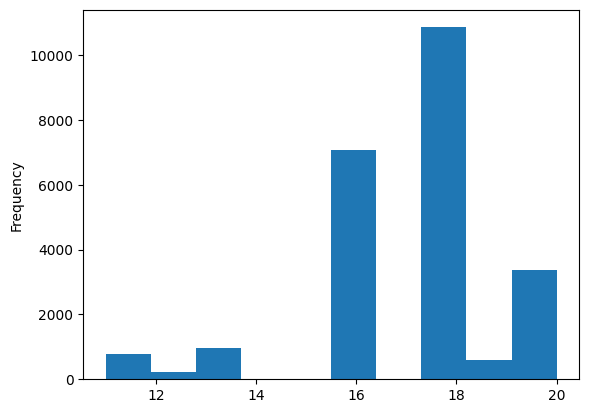

In [33]:
def limit_countries(val):
    if val in  {'United States of America', 'India', 'China'}:
        return val
    return 'Another'

(df
 .assign(sex=df.Q1.replace({'Prefer not to say': 'Another',
                            'Prefer to self-describe': 'Another'}).astype('category'),
    age=df.Q2.str.slice(0,2).astype('int8'),
    country=df.Q3.apply(limit_countries).astype('category'))
 .Q4.replace({'Master’s degree': 18,
 'Bachelor’s degree': 16,
 'Doctoral degree': 20,
 'Some college/university study without earning a bachelor’s degree': 13,
 'Professional degree': 19,
 'I prefer not to answer': None,
 'No formal education past high school': 12})
 .fillna(11)
 .astype('int8')
 .plot.hist()
 )

In [34]:
def limit_countries(val):
    if val in  {'United States of America', 'India', 'China'}:
        return val
    return 'Another'

(df
 .assign(sex=df.Q1.replace({'Prefer not to say': 'Another',
                            'Prefer to self-describe': 'Another'}).astype('category'),
    age=df.Q2.str.slice(0,2).astype('int8'),
    country=df.Q3.apply(limit_countries).astype('category'),
    education=df.Q4.replace({'Master’s degree': 18,
    'Bachelor’s degree': 16,
    'Doctoral degree': 20,
    'Some college/university study without earning a bachelor’s degree': 13,
    'Professional degree': 19,
    'I prefer not to answer': None,
    'No formal education past high school': 12})
    .fillna(11)
    .astype('int8')
    )
)

/var/folders/qn/r8_0pgj1645dn1w69vqls6cw0000gn/T/ipykernel_54972/1050516989.py:11: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  education=df.Q4.replace({'Master’s degree': 18,


,Time from Start to Finish (seconds),Q1,Q1_OTHER_TEXT,Q2,Q3,Q4,Q5,Q6,Q6_OTHER_TEXT,Q7,...,Q50_Part_4,Q50_Part_5,Q50_Part_6,Q50_Part_7,Q50_Part_8,Q50_OTHER_TEXT,sex,age,country,education
1,710,Female,-1,45-49,United States of America,Doctoral degree,Other,Consultant,-1,Other,...,NaN,NaN,NaN,NaN,NaN,-1,Female,45,United States of America,20
2,434,Male,-1,30-34,Indonesia,Bachelor’s degree,Engineering (non-computer focused),Other,0,Manufacturing/Fabrication,...,NaN,NaN,NaN,NaN,NaN,-1,Male,30,Another,16
3,718,Female,-1,30-34,United States of America,Master’s degree,"Computer science (software engineering, etc.)",Data Scientist,-1,I am a student,...,NaN,NaN,NaN,NaN,NaN,-1,Female,30,United States of America,18
4,621,Male,-1,35-39,United States of America,Master’s degree,"Social sciences (anthropology, psychology, soc...",Not employed,-1,NaN,...,NaN,Not enough incentives to share my work,NaN,NaN,NaN,-1,Male,35,United States of America,18
5,731,Male,-1,22-24,India,Master’s degree,Mathematics or statistics,Data Analyst,-1,I am a student,...,NaN,Not enough incentives to share my work,NaN,NaN,NaN,-1,Male,22,India,18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23855,575,Male,-1,45-49,France,Doctoral degree,"Computer science (software engineering, etc.)",Chief Officer,-1,Computers/Technology,...,NaN,NaN,NaN,NaN,NaN,-1,Male,45,Another,20
23856,131,Female,-1,25-29,Turkey,Master’s degree,Engineering (non-computer focused),NaN,-1,NaN,...,NaN,NaN,NaN,NaN,NaN,-1,Female,25,Another,18
23857,370,Male,-1,22-24,Turkey,Master’s degree,"Computer science (software engineering, etc.)",Software Engineer,-1,Computers/Technology,...,NaN,NaN,NaN,NaN,NaN,-1,Male,22,Another,18
23858,36,Male,-1,25-29,United Kingdom of Great Britain and Northern I...,NaN,NaN,NaN,-1,NaN,...,NaN,NaN,NaN,NaN,NaN,-1,Male,25,Another,11


In [36]:
def limit_countries(val):
    if val in  {'United States of America', 'India', 'China'}:
        return val
    return 'Another'

def clean_education(df_):
    return (df_
        .Q4
        .replace({'Master’s degree': 18,
            'Bachelor’s degree': 16,
            'Doctoral degree': 20,
            'Some college/university study without earning a bachelor’s degree': 13,
            'Professional degree': 19,
            'I prefer not to answer': None,
            'No formal education past high school': 12})
        .fillna(11)
        .astype('int8')
    )

(df
 .assign(sex=df.Q1.replace({'Prefer not to say': 'Another',
                            'Prefer to self-describe': 'Another'}).astype('category'),
    age=df.Q2.str.slice(0,2).astype('int8'),
    country=df.Q3.apply(limit_countries).astype('category'),
    education=clean_education
    )
)

/var/folders/qn/r8_0pgj1645dn1w69vqls6cw0000gn/T/ipykernel_54972/1465177742.py:9: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  .replace({'Master’s degree': 18,


,Time from Start to Finish (seconds),Q1,Q1_OTHER_TEXT,Q2,Q3,Q4,Q5,Q6,Q6_OTHER_TEXT,Q7,...,Q50_Part_4,Q50_Part_5,Q50_Part_6,Q50_Part_7,Q50_Part_8,Q50_OTHER_TEXT,sex,age,country,education
1,710,Female,-1,45-49,United States of America,Doctoral degree,Other,Consultant,-1,Other,...,NaN,NaN,NaN,NaN,NaN,-1,Female,45,United States of America,20
2,434,Male,-1,30-34,Indonesia,Bachelor’s degree,Engineering (non-computer focused),Other,0,Manufacturing/Fabrication,...,NaN,NaN,NaN,NaN,NaN,-1,Male,30,Another,16
3,718,Female,-1,30-34,United States of America,Master’s degree,"Computer science (software engineering, etc.)",Data Scientist,-1,I am a student,...,NaN,NaN,NaN,NaN,NaN,-1,Female,30,United States of America,18
4,621,Male,-1,35-39,United States of America,Master’s degree,"Social sciences (anthropology, psychology, soc...",Not employed,-1,NaN,...,NaN,Not enough incentives to share my work,NaN,NaN,NaN,-1,Male,35,United States of America,18
5,731,Male,-1,22-24,India,Master’s degree,Mathematics or statistics,Data Analyst,-1,I am a student,...,NaN,Not enough incentives to share my work,NaN,NaN,NaN,-1,Male,22,India,18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23855,575,Male,-1,45-49,France,Doctoral degree,"Computer science (software engineering, etc.)",Chief Officer,-1,Computers/Technology,...,NaN,NaN,NaN,NaN,NaN,-1,Male,45,Another,20
23856,131,Female,-1,25-29,Turkey,Master’s degree,Engineering (non-computer focused),NaN,-1,NaN,...,NaN,NaN,NaN,NaN,NaN,-1,Female,25,Another,18
23857,370,Male,-1,22-24,Turkey,Master’s degree,"Computer science (software engineering, etc.)",Software Engineer,-1,Computers/Technology,...,NaN,NaN,NaN,NaN,NaN,-1,Male,22,Another,18
23858,36,Male,-1,25-29,United Kingdom of Great Britain and Northern I...,NaN,NaN,NaN,-1,NaN,...,NaN,NaN,NaN,NaN,NaN,-1,Male,25,Another,11


## Q5 - Studies

In [37]:
def limit_countries(val):
    if val in  {'United States of America', 'India', 'China'}:
        return val
    return 'Another'

def clean_education(df_):
    return (df_
        .Q4
        .replace({'Master’s degree': 18,
            'Bachelor’s degree': 16,
            'Doctoral degree': 20,
            'Some college/university study without earning a bachelor’s degree': 13,
            'Professional degree': 19,
            'I prefer not to answer': None,
            'No formal education past high school': 12})
        .fillna(11)
        .astype('int8')
    )

(df
 .assign(sex=df.Q1.replace({'Prefer not to say': 'Another',
                            'Prefer to self-describe': 'Another'}).astype('category'),
    age=df.Q2.str.slice(0,2).astype('int8'),
    country=df.Q3.apply(limit_countries).astype('category'),
    education=clean_education
    )
 .Q5.value_counts(dropna=False)
)

/var/folders/qn/r8_0pgj1645dn1w69vqls6cw0000gn/T/ipykernel_54972/2314672209.py:9: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  .replace({'Master’s degree': 18,


Q5
Computer science (software engineering, etc.)                    9430
Engineering (non-computer focused)                               3705
Mathematics or statistics                                        2950
A business discipline (accounting, economics, finance, etc.)     1791
Physics or astronomy                                             1110
Information technology, networking, or system administration     1029
NaN                                                               912
Medical or life sciences (biology, chemistry, medicine, etc.)     871
Other                                                             770
Social sciences (anthropology, psychology, sociology, etc.)       554
Humanities (history, literature, philosophy, etc.)                269
Environmental science or geology                                  253
I never declared a major                                          128
Fine arts or performing arts                                       87
Name: count, dtyp

In [39]:
def limit_countries(val):
    if val in  {'United States of America', 'India', 'China'}:
        return val
    return 'Another'

def clean_education(df_):
    return (df_
        .Q4
        .replace({'Master’s degree': 18,
            'Bachelor’s degree': 16,
            'Doctoral degree': 20,
            'Some college/university study without earning a bachelor’s degree': 13,
            'Professional degree': 19,
            'I prefer not to answer': None,
            'No formal education past high school': 12})
        .fillna(11)
        .astype('int8')
    )

def only_cs_stat_val(val):
    if val not in {'cs', 'eng', 'stat'}:
        return 'other'
    return val


(df
 .assign(sex=df.Q1.replace({'Prefer not to say': 'Another',
                            'Prefer to self-describe': 'Another'}).astype('category'),
    age=df.Q2.str.slice(0,2).astype('int8'),
    country=df.Q3.apply(limit_countries).astype('category'),
    education=clean_education
    )
 .Q5.replace({
        'Computer science (software engineering, etc.)': 'cs',
        'Engineering (non-computer focused)': 'eng',
        'Mathematics or statistics': 'stat'})
 .apply(only_cs_stat_val)
)

/var/folders/qn/r8_0pgj1645dn1w69vqls6cw0000gn/T/ipykernel_54972/3247905672.py:9: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  .replace({'Master’s degree': 18,


1        other
2          eng
3           cs
4        other
5         stat
         ...  
23855       cs
23856      eng
23857       cs
23858    other
23859     stat
Name: Q5, Length: 23859, dtype: object

In [40]:
def limit_countries(val):
    if val in  {'United States of America', 'India', 'China'}:
        return val
    return 'Another'

def clean_education(df_):
    return (df_
        .Q4
        .replace({'Master’s degree': 18,
            'Bachelor’s degree': 16,
            'Doctoral degree': 20,
            'Some college/university study without earning a bachelor’s degree': 13,
            'Professional degree': 19,
            'I prefer not to answer': None,
            'No formal education past high school': 12})
        .fillna(11)
        .astype('int8')
    )

def only_cs_stat_val(val):
    if val not in {'cs', 'eng', 'stat'}:
        return 'other'
    return val


(df
 .assign(sex=df.Q1.replace({'Prefer not to say': 'Another',
                            'Prefer to self-describe': 'Another'}).astype('category'),
    age=df.Q2.str.slice(0,2).astype('int8'),
    country=df.Q3.apply(limit_countries).astype('category'),
    education=clean_education
    )
 .Q5.replace({
        'Computer science (software engineering, etc.)': 'cs',
        'Engineering (non-computer focused)': 'eng',
        'Mathematics or statistics': 'stat'})
 .apply(only_cs_stat_val)
 .value_counts()
)

/var/folders/qn/r8_0pgj1645dn1w69vqls6cw0000gn/T/ipykernel_54972/1269926723.py:9: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  .replace({'Master’s degree': 18,


Q5
cs       9430
other    7774
eng      3705
stat     2950
Name: count, dtype: int64

In [42]:
def limit_countries(val):
    if val in  {'United States of America', 'India', 'China'}:
        return val
    return 'Another'

def clean_education(df_):
    return (df_
        .Q4
        .replace({'Master’s degree': 18,
            'Bachelor’s degree': 16,
            'Doctoral degree': 20,
            'Some college/university study without earning a bachelor’s degree': 13,
            'Professional degree': 19,
            'I prefer not to answer': None,
            'No formal education past high school': 12})
        .fillna(11)
        .astype('int8')
    )

def only_cs_stat_val(val):
    if val not in {'cs', 'eng', 'stat'}:
        return 'other'
    return val


(df
 .assign(sex=df.Q1.replace({'Prefer not to say': 'Another',
                            'Prefer to self-describe': 'Another'}).astype('category'),
    age=df.Q2.str.slice(0,2).astype('int8'),
    country=df.Q3.apply(limit_countries).astype('category'),
    education=clean_education,
    studies=df.Q5.replace({
        'Computer science (software engineering, etc.)': 'cs',
        'Engineering (non-computer focused)': 'eng',
        'Mathematics or statistics': 'stat'})
     .apply(only_cs_stat_val)
     .astype('category')
 )
)

/var/folders/qn/r8_0pgj1645dn1w69vqls6cw0000gn/T/ipykernel_54972/1032926299.py:9: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  .replace({'Master’s degree': 18,


,Time from Start to Finish (seconds),Q1,Q1_OTHER_TEXT,Q2,Q3,Q4,Q5,Q6,Q6_OTHER_TEXT,Q7,...,Q50_Part_5,Q50_Part_6,Q50_Part_7,Q50_Part_8,Q50_OTHER_TEXT,sex,age,country,education,studies
1,710,Female,-1,45-49,United States of America,Doctoral degree,Other,Consultant,-1,Other,...,NaN,NaN,NaN,NaN,-1,Female,45,United States of America,20,other
2,434,Male,-1,30-34,Indonesia,Bachelor’s degree,Engineering (non-computer focused),Other,0,Manufacturing/Fabrication,...,NaN,NaN,NaN,NaN,-1,Male,30,Another,16,eng
3,718,Female,-1,30-34,United States of America,Master’s degree,"Computer science (software engineering, etc.)",Data Scientist,-1,I am a student,...,NaN,NaN,NaN,NaN,-1,Female,30,United States of America,18,cs
4,621,Male,-1,35-39,United States of America,Master’s degree,"Social sciences (anthropology, psychology, soc...",Not employed,-1,NaN,...,Not enough incentives to share my work,NaN,NaN,NaN,-1,Male,35,United States of America,18,other
5,731,Male,-1,22-24,India,Master’s degree,Mathematics or statistics,Data Analyst,-1,I am a student,...,Not enough incentives to share my work,NaN,NaN,NaN,-1,Male,22,India,18,stat
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23855,575,Male,-1,45-49,France,Doctoral degree,"Computer science (software engineering, etc.)",Chief Officer,-1,Computers/Technology,...,NaN,NaN,NaN,NaN,-1,Male,45,Another,20,cs
23856,131,Female,-1,25-29,Turkey,Master’s degree,Engineering (non-computer focused),NaN,-1,NaN,...,NaN,NaN,NaN,NaN,-1,Female,25,Another,18,eng
23857,370,Male,-1,22-24,Turkey,Master’s degree,"Computer science (software engineering, etc.)",Software Engineer,-1,Computers/Technology,...,NaN,NaN,NaN,NaN,-1,Male,22,Another,18,cs
23858,36,Male,-1,25-29,United Kingdom of Great Britain and Northern I...,NaN,NaN,NaN,-1,NaN,...,NaN,NaN,NaN,NaN,-1,Male,25,Another,11,other


## Q6 - Occupation

In [43]:
def limit_countries(val):
    if val in  {'United States of America', 'India', 'China'}:
        return val
    return 'Another'

def clean_education(df_):
    return (df_
        .Q4
        .replace({'Master’s degree': 18,
            'Bachelor’s degree': 16,
            'Doctoral degree': 20,
            'Some college/university study without earning a bachelor’s degree': 13,
            'Professional degree': 19,
            'I prefer not to answer': None,
            'No formal education past high school': 12})
        .fillna(11)
        .astype('int8')
    )

def only_cs_stat_val(val):
    if val not in {'cs', 'eng', 'stat'}:
        return 'other'
    return val


(df
 .assign(sex=df.Q1.replace({'Prefer not to say': 'Another',
                            'Prefer to self-describe': 'Another'}).astype('category'),
    age=df.Q2.str.slice(0,2).astype('int8'),
    country=df.Q3.apply(limit_countries).astype('category'),
    education=clean_education,
    studies=df.Q5.replace({
        'Computer science (software engineering, etc.)': 'cs',
        'Engineering (non-computer focused)': 'eng',
        'Mathematics or statistics': 'stat'})
     .apply(only_cs_stat_val)
     .astype('category')
 )
 .Q6.value_counts(dropna=False)
)

/var/folders/qn/r8_0pgj1645dn1w69vqls6cw0000gn/T/ipykernel_54972/1344606623.py:9: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  .replace({'Master’s degree': 18,


Q6
Student                    5253
Data Scientist             4137
Software Engineer          3130
Data Analyst               1922
Other                      1322
Research Scientist         1189
NaN                         959
Not employed                842
Consultant                  785
Business Analyst            772
Data Engineer               737
Research Assistant          600
Manager                     590
Product/Project Manager     428
Chief Officer               360
Statistician                237
DBA/Database Engineer       145
Developer Advocate          117
Marketing Analyst           115
Salesperson                 102
Principal Investigator       97
Data Journalist              20
Name: count, dtype: int64

In [45]:
def limit_countries(val):
    if val in  {'United States of America', 'India', 'China'}:
        return val
    return 'Another'

def clean_education(df_):
    return (df_
        .Q4
        .replace({'Master’s degree': 18,
            'Bachelor’s degree': 16,
            'Doctoral degree': 20,
            'Some college/university study without earning a bachelor’s degree': 13,
            'Professional degree': 19,
            'I prefer not to answer': None,
            'No formal education past high school': 12})
        .fillna(11)
        .astype('int8')
    )

def only_cs_stat_val(val):
    if val not in {'cs', 'eng', 'stat'}:
        return 'other'
    return val

def limit_occupation(val):
    if val in {'Student', 'Data Scientist', 'Software Engineer', 'Not employed',
              'Data Engineer'}:
        return val
    return 'Another'

(df
 .assign(sex=df.Q1.replace({'Prefer not to say': 'Another',
                            'Prefer to self-describe': 'Another'}).astype('category'),
    age=df.Q2.str.slice(0,2).astype('int8'),
    country=df.Q3.apply(limit_countries).astype('category'),
    education=clean_education,
    studies=df.Q5.replace({
        'Computer science (software engineering, etc.)': 'cs',
        'Engineering (non-computer focused)': 'eng',
        'Mathematics or statistics': 'stat'})
     .apply(only_cs_stat_val)
     .astype('category')
 )
    .Q6.apply(limit_occupation).value_counts()
)

/var/folders/qn/r8_0pgj1645dn1w69vqls6cw0000gn/T/ipykernel_54972/3587241821.py:9: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  .replace({'Master’s degree': 18,


Q6
Another              9760
Student              5253
Data Scientist       4137
Software Engineer    3130
Not employed          842
Data Engineer         737
Name: count, dtype: int64

In [46]:
def limit_countries(val):
    if val in  {'United States of America', 'India', 'China'}:
        return val
    return 'Another'

def clean_education(df_):
    return (df_
        .Q4
        .replace({'Master’s degree': 18,
            'Bachelor’s degree': 16,
            'Doctoral degree': 20,
            'Some college/university study without earning a bachelor’s degree': 13,
            'Professional degree': 19,
            'I prefer not to answer': None,
            'No formal education past high school': 12})
        .fillna(11)
        .astype('int8')
    )

def only_cs_stat_val(val):
    if val not in {'cs', 'eng', 'stat'}:
        return 'other'
    return val

def limit_occupation(val):
    if val in {'Student', 'Data Scientist', 'Software Engineer', 'Not employed',
              'Data Engineer'}:
        return val
    return 'Another'

(df
 .assign(sex=df.Q1.replace({'Prefer not to say': 'Another',
                            'Prefer to self-describe': 'Another'}).astype('category'),
    age=df.Q2.str.slice(0,2).astype('int8'),
    country=df.Q3.apply(limit_countries).astype('category'),
    education=clean_education,
    studies=df.Q5.replace({
        'Computer science (software engineering, etc.)': 'cs',
        'Engineering (non-computer focused)': 'eng',
        'Mathematics or statistics': 'stat'})
     .apply(only_cs_stat_val)
     .astype('category'),
     occupation=df.Q6.apply(limit_occupation).astype('category')
 )
)

/var/folders/qn/r8_0pgj1645dn1w69vqls6cw0000gn/T/ipykernel_54972/1130791317.py:9: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  .replace({'Master’s degree': 18,


,Time from Start to Finish (seconds),Q1,Q1_OTHER_TEXT,Q2,Q3,Q4,Q5,Q6,Q6_OTHER_TEXT,Q7,...,Q50_Part_6,Q50_Part_7,Q50_Part_8,Q50_OTHER_TEXT,sex,age,country,education,studies,occupation
1,710,Female,-1,45-49,United States of America,Doctoral degree,Other,Consultant,-1,Other,...,NaN,NaN,NaN,-1,Female,45,United States of America,20,other,Another
2,434,Male,-1,30-34,Indonesia,Bachelor’s degree,Engineering (non-computer focused),Other,0,Manufacturing/Fabrication,...,NaN,NaN,NaN,-1,Male,30,Another,16,eng,Another
3,718,Female,-1,30-34,United States of America,Master’s degree,"Computer science (software engineering, etc.)",Data Scientist,-1,I am a student,...,NaN,NaN,NaN,-1,Female,30,United States of America,18,cs,Data Scientist
4,621,Male,-1,35-39,United States of America,Master’s degree,"Social sciences (anthropology, psychology, soc...",Not employed,-1,NaN,...,NaN,NaN,NaN,-1,Male,35,United States of America,18,other,Not employed
5,731,Male,-1,22-24,India,Master’s degree,Mathematics or statistics,Data Analyst,-1,I am a student,...,NaN,NaN,NaN,-1,Male,22,India,18,stat,Another
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23855,575,Male,-1,45-49,France,Doctoral degree,"Computer science (software engineering, etc.)",Chief Officer,-1,Computers/Technology,...,NaN,NaN,NaN,-1,Male,45,Another,20,cs,Another
23856,131,Female,-1,25-29,Turkey,Master’s degree,Engineering (non-computer focused),NaN,-1,NaN,...,NaN,NaN,NaN,-1,Female,25,Another,18,eng,Another
23857,370,Male,-1,22-24,Turkey,Master’s degree,"Computer science (software engineering, etc.)",Software Engineer,-1,Computers/Technology,...,NaN,NaN,NaN,-1,Male,22,Another,18,cs,Software Engineer
23858,36,Male,-1,25-29,United Kingdom of Great Britain and Northern I...,NaN,NaN,NaN,-1,NaN,...,NaN,NaN,NaN,-1,Male,25,Another,11,other,Another


## Q8 - Years of Experience

In [48]:
def limit_countries(val):
    if val in  {'United States of America', 'India', 'China'}:
        return val
    return 'Another'

def clean_education(df_):
    return (df_
        .Q4
        .replace({'Master’s degree': 18,
            'Bachelor’s degree': 16,
            'Doctoral degree': 20,
            'Some college/university study without earning a bachelor’s degree': 13,
            'Professional degree': 19,
            'I prefer not to answer': None,
            'No formal education past high school': 12})
        .fillna(11)
        .astype('int8')
    )

def only_cs_stat_val(val):
    if val not in {'cs', 'eng', 'stat'}:
        return 'other'
    return val

def limit_occupation(val):
    if val in {'Student', 'Data Scientist', 'Software Engineer', 'Not employed',
              'Data Engineer'}:
        return val
    return 'Another'

(df
 .assign(sex=df.Q1.replace({'Prefer not to say': 'Another',
                            'Prefer to self-describe': 'Another'}).astype('category'),
    age=df.Q2.str.slice(0,2).astype('int8'),
    country=df.Q3.apply(limit_countries).astype('category'),
    education=clean_education,
    studies=df.Q5.replace({
        'Computer science (software engineering, etc.)': 'cs',
        'Engineering (non-computer focused)': 'eng',
        'Mathematics or statistics': 'stat'})
     .apply(only_cs_stat_val)
     .astype('category'),
     occupation=df.Q6.apply(limit_occupation).astype('category')
 )
 .Q8.value_counts(dropna=False)  # years experience
)

/var/folders/qn/r8_0pgj1645dn1w69vqls6cw0000gn/T/ipykernel_54972/2284430536.py:9: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  .replace({'Master’s degree': 18,


Q8
0-1      5898
1-2      3745
NaN      2758
2-3      2577
5-10     2524
3-4      1751
10-15    1512
4-5      1488
15-20     854
20-25     384
30 +      197
25-30     171
Name: count, dtype: int64

/var/folders/qn/r8_0pgj1645dn1w69vqls6cw0000gn/T/ipykernel_54972/3615061946.py:9: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  .replace({'Master’s degree': 18,


<AxesSubplot: >

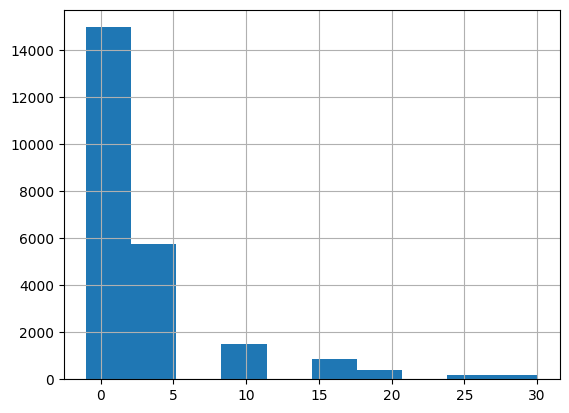

In [49]:
def limit_countries(val):
    if val in  {'United States of America', 'India', 'China'}:
        return val
    return 'Another'

def clean_education(df_):
    return (df_
        .Q4
        .replace({'Master’s degree': 18,
            'Bachelor’s degree': 16,
            'Doctoral degree': 20,
            'Some college/university study without earning a bachelor’s degree': 13,
            'Professional degree': 19,
            'I prefer not to answer': None,
            'No formal education past high school': 12})
        .fillna(11)
        .astype('int8')
    )

def only_cs_stat_val(val):
    if val not in {'cs', 'eng', 'stat'}:
        return 'other'
    return val

def limit_occupation(val):
    if val in {'Student', 'Data Scientist', 'Software Engineer', 'Not employed',
              'Data Engineer'}:
        return val
    return 'Another'

(df
 .assign(sex=df.Q1.replace({'Prefer not to say': 'Another',
                            'Prefer to self-describe': 'Another'}).astype('category'),
    age=df.Q2.str.slice(0,2).astype('int8'),
    country=df.Q3.apply(limit_countries).astype('category'),
    education=clean_education,
    studies=df.Q5.replace({
        'Computer science (software engineering, etc.)': 'cs',
        'Engineering (non-computer focused)': 'eng',
        'Mathematics or statistics': 'stat'})
     .apply(only_cs_stat_val)
     .astype('category'),
     occupation=df.Q6.apply(limit_occupation).astype('category')
 )
 .Q8
  .str.replace('+', '')
  .str.split('-', expand=True)
  .iloc[:,0]
  .fillna(-1)
  .astype(int)
.hist()
)

In [51]:
def limit_countries(val):
    if val in  {'United States of America', 'India', 'China'}:
        return val
    return 'Another'

def clean_education(df_):
    return (df_
        .Q4
        .replace({'Master’s degree': 18,
            'Bachelor’s degree': 16,
            'Doctoral degree': 20,
            'Some college/university study without earning a bachelor’s degree': 13,
            'Professional degree': 19,
            'I prefer not to answer': None,
            'No formal education past high school': 12})
        .fillna(11)
        .astype('int8')
    )

def only_cs_stat_val(val):
    if val not in {'cs', 'eng', 'stat'}:
        return 'other'
    return val

def limit_occupation(val):
    if val in {'Student', 'Data Scientist', 'Software Engineer', 'Not employed',
              'Data Engineer'}:
        return val
    return 'Another'

(df
 .assign(sex=df.Q1.replace({'Prefer not to say': 'Another',
                            'Prefer to self-describe': 'Another'}).astype('category'),
    age=df.Q2.str.slice(0,2).astype('int8'),
    country=df.Q3.apply(limit_countries).astype('category'),
    education=clean_education,
    studies=df.Q5.replace({
        'Computer science (software engineering, etc.)': 'cs',
        'Engineering (non-computer focused)': 'eng',
        'Mathematics or statistics': 'stat'})
     .apply(only_cs_stat_val)
     .astype('category'),
    occupation=df.Q6.apply(limit_occupation).astype('category'),
    years_experience=(df
        .Q8
        .str.replace('+', '')
        .str.split('-', expand=True)
        .iloc[:,0]
        .fillna(-1)
        .astype('int8'))
    )
)

/var/folders/qn/r8_0pgj1645dn1w69vqls6cw0000gn/T/ipykernel_54972/2045217884.py:9: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  .replace({'Master’s degree': 18,


,Time from Start to Finish (seconds),Q1,Q1_OTHER_TEXT,Q2,Q3,Q4,Q5,Q6,Q6_OTHER_TEXT,Q7,...,Q50_Part_7,Q50_Part_8,Q50_OTHER_TEXT,sex,age,country,education,studies,occupation,years_experience
1,710,Female,-1,45-49,United States of America,Doctoral degree,Other,Consultant,-1,Other,...,NaN,NaN,-1,Female,45,United States of America,20,other,Another,-1
2,434,Male,-1,30-34,Indonesia,Bachelor’s degree,Engineering (non-computer focused),Other,0,Manufacturing/Fabrication,...,NaN,NaN,-1,Male,30,Another,16,eng,Another,5
3,718,Female,-1,30-34,United States of America,Master’s degree,"Computer science (software engineering, etc.)",Data Scientist,-1,I am a student,...,NaN,NaN,-1,Female,30,United States of America,18,cs,Data Scientist,0
4,621,Male,-1,35-39,United States of America,Master’s degree,"Social sciences (anthropology, psychology, soc...",Not employed,-1,NaN,...,NaN,NaN,-1,Male,35,United States of America,18,other,Not employed,-1
5,731,Male,-1,22-24,India,Master’s degree,Mathematics or statistics,Data Analyst,-1,I am a student,...,NaN,NaN,-1,Male,22,India,18,stat,Another,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23855,575,Male,-1,45-49,France,Doctoral degree,"Computer science (software engineering, etc.)",Chief Officer,-1,Computers/Technology,...,NaN,NaN,-1,Male,45,Another,20,cs,Another,5
23856,131,Female,-1,25-29,Turkey,Master’s degree,Engineering (non-computer focused),NaN,-1,NaN,...,NaN,NaN,-1,Female,25,Another,18,eng,Another,-1
23857,370,Male,-1,22-24,Turkey,Master’s degree,"Computer science (software engineering, etc.)",Software Engineer,-1,Computers/Technology,...,NaN,NaN,-1,Male,22,Another,18,cs,Software Engineer,0
23858,36,Male,-1,25-29,United Kingdom of Great Britain and Northern I...,NaN,NaN,NaN,-1,NaN,...,NaN,NaN,-1,Male,25,Another,11,other,Another,-1


In [52]:
def limit_countries(val):
    if val in  {'United States of America', 'India', 'China'}:
        return val
    return 'Another'

def clean_education(df_):
    return (df_
        .Q4
        .replace({'Master’s degree': 18,
            'Bachelor’s degree': 16,
            'Doctoral degree': 20,
            'Some college/university study without earning a bachelor’s degree': 13,
            'Professional degree': 19,
            'I prefer not to answer': None,
            'No formal education past high school': 12})
        .fillna(11)
        .astype('int8')
    )

def only_cs_stat_val(val):
    if val not in {'cs', 'eng', 'stat'}:
        return 'other'
    return val

def limit_occupation(val):
    if val in {'Student', 'Data Scientist', 'Software Engineer', 'Not employed',
              'Data Engineer'}:
        return val
    return 'Another'

(df
 .assign(sex=df.Q1.replace({'Prefer not to say': 'Another',
                            'Prefer to self-describe': 'Another'}).astype('category'),
    age=df.Q2.str.slice(0,2).astype('int8'),
    country=df.Q3.apply(limit_countries).astype('category'),
    education=clean_education,
    studies=df.Q5.replace({
        'Computer science (software engineering, etc.)': 'cs',
        'Engineering (non-computer focused)': 'eng',
        'Mathematics or statistics': 'stat'})
     .apply(only_cs_stat_val)
     .astype('category'),
    occupation=df.Q6.apply(limit_occupation).astype('category'),
    years_experience=(df
        .Q8
        .str.replace('+', '')
        .str.split('-', expand=True)
        .iloc[:,0]
        .fillna(-1)
        .astype('int8'))
    )
    .Q9.value_counts(dropna=False) # compensation
)

/var/folders/qn/r8_0pgj1645dn1w69vqls6cw0000gn/T/ipykernel_54972/2564943100.py:9: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  .replace({'Master’s degree': 18,


Q9
I do not wish to disclose my approximate yearly compensation    4756
0-10,000                                                        4398
NaN                                                             3674
10-20,000                                                       1937
20-30,000                                                       1395
30-40,000                                                       1119
40-50,000                                                        965
50-60,000                                                        919
100-125,000                                                      843
60-70,000                                                        729
70-80,000                                                        677
90-100,000                                                       566
125-150,000                                                      533
80-90,000                                                        506
150-200,000                    

## Q9 - Salary

In [ ]:
def limit_countries(val):
    if val in  {'United States of America', 'India', 'China'}:
        return val
    return 'Another'

def clean_education(df_):
    return (df_
        .Q4
        .replace({'Master’s degree': 18,
            'Bachelor’s degree': 16,
            'Doctoral degree': 20,
            'Some college/university study without earning a bachelor’s degree': 13,
            'Professional degree': 19,
            'I prefer not to answer': None,
            'No formal education past high school': 12})
        .fillna(11)
        .astype('int8')
    )

def only_cs_stat_val(val):
    if val not in {'cs', 'eng', 'stat'}:
        return 'other'
    return val

def limit_occupation(val):
    if val in {'Student', 'Data Scientist', 'Software Engineer', 'Not employed',
              'Data Engineer'}:
        return val
    return 'Another'

(df
 .assign(sex=df.Q1.replace({'Prefer not to say': 'Another',
                            'Prefer to self-describe': 'Another'}).astype('category'),
    age=df.Q2.str.slice(0,2).astype('int8'),
    country=df.Q3.apply(limit_countries).astype('category'),
    education=clean_education,
    studies=df.Q5.replace({
        'Computer science (software engineering, etc.)': 'cs',
        'Engineering (non-computer focused)': 'eng',
        'Mathematics or statistics': 'stat'})
     .apply(only_cs_stat_val)
     .astype('category'),
    occupation=df.Q6.apply(limit_occupation).astype('category'),
    years_experience=(df
        .Q8
        .str.replace('+', '')
        .str.split('-', expand=True)
        .iloc[:,0]
        .fillna(-1)
        .astype('int8'))
    )
    .Q9.value_counts(dropna=False) # compensation
)

/var/folders/qn/r8_0pgj1645dn1w69vqls6cw0000gn/T/ipykernel_54972/2564943100.py:9: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  .replace({'Master’s degree': 18,


Q9
I do not wish to disclose my approximate yearly compensation    4756
0-10,000                                                        4398
NaN                                                             3674
10-20,000                                                       1937
20-30,000                                                       1395
30-40,000                                                       1119
40-50,000                                                        965
50-60,000                                                        919
100-125,000                                                      843
60-70,000                                                        729
70-80,000                                                        677
90-100,000                                                       566
125-150,000                                                      533
80-90,000                                                        506
150-200,000                    

In [54]:
# let's see who did not answer the compensation question
na_mask = df.Q9.isna()
hide_mask = df.Q9.str.startswith('I do not').fillna(False)
df[na_mask | hide_mask].Q6.value_counts()

/var/folders/qn/r8_0pgj1645dn1w69vqls6cw0000gn/T/ipykernel_54972/2264561225.py:3: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  hide_mask = df.Q9.str.startswith('I do not').fillna(False)


Q6
Student                    2633
Data Scientist              888
Not employed                842
Software Engineer           790
Data Analyst                494
Other                       303
Research Scientist          264
Consultant                  212
Business Analyst            182
Data Engineer               173
Research Assistant          153
Manager                     138
Chief Officer               109
Product/Project Manager      99
Statistician                 57
Developer Advocate           32
Marketing Analyst            28
DBA/Database Engineer        28
Salesperson                  22
Principal Investigator       14
Data Journalist              10
Name: count, dtype: int64

In [58]:
# let's see who did not answer the compensation question
# as a chain
(df
 .query('Q9.isna() or Q9.str.startswith("I do not")')
 .Q6.value_counts()
)


UndefinedVariableError: name 'Series_1_0x200x70x2e0xaf0x20x00x00x0' is not defined

In [ ]:
df.Q9.str.startswith('I do not').value_counts(dropna=False)

False    15429
True      4756
NaN       3674
Name: Q9, dtype: int64

In [ ]:
# Plan - remove missing numbers pull out first part
na_mask = df.Q9.isna()
hide_mask = df.Q9.str.startswith('I do not').fillna(False)
(df.Q9
 [(~na_mask) & (~hide_mask)]
 .str.replace('+','')
 .str.replace(',','')
 .str.replace('500000', '500')
 #.str.replace('I do not wish to disclose my approximate yearly compensation','')
 .str.split('-', expand=True)
 .iloc[:,0]
 .astype(int)
 .mul(1000)
 .rename('Q9_salary')
 #.describe()
 )

/var/folders/qn/r8_0pgj1645dn1w69vqls6cw0000gn/T/ipykernel_54972/586758072.py:3: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  hide_mask = df.Q9.str.startswith('I do not').fillna(False)


2         10000
3             0
5             0
7         10000
8             0
          ...  
23844     90000
23845         0
23854     10000
23855    250000
23857     10000
Name: Q9_salary, Length: 15429, dtype: int64

In [65]:
def limit_countries(val):
    if val in  {'United States of America', 'India', 'China'}:
        return val
    return 'Another'

def clean_education(df_):
    return (df_
        .Q4
        .replace({'Master’s degree': 18,
            'Bachelor’s degree': 16,
            'Doctoral degree': 20,
            'Some college/university study without earning a bachelor’s degree': 13,
            'Professional degree': 19,
            'I prefer not to answer': None,
            'No formal education past high school': 12})
        .fillna(11)
        .astype('int8')
    )

def only_cs_stat_val(val):
    if val not in {'cs', 'eng', 'stat'}:
        return 'other'
    return val

def limit_occupation(val):
    if val in {'Student', 'Data Scientist', 'Software Engineer', 'Not employed',
              'Data Engineer'}:
        return val
    return 'Another'

(df
 .loc[~df.Q9.isna() & ~df.Q9.str.startswith('I do not').fillna(False)]
 .assign(sex=df.Q1.replace({'Prefer not to say': 'Another',
                            'Prefer to self-describe': 'Another'}).astype('category'),
    age=df.Q2.str.slice(0,2).astype('int8'),
    country=df.Q3.apply(limit_countries).astype('category'),
    education=clean_education,
    studies=df.Q5.replace({
        'Computer science (software engineering, etc.)': 'cs',
        'Engineering (non-computer focused)': 'eng',
        'Mathematics or statistics': 'stat'})
     .apply(only_cs_stat_val)
     .astype('category'),
    occupation=df.Q6.apply(limit_occupation).astype('category'),
    years_experience=(df
        .Q8
        .str.replace('+', '')
        .str.split('-', expand=True)
        .iloc[:,0]
        .fillna(-1)
        .astype('int8')),
    salary=(df.Q9
        .str.replace('+','')
        .str.replace(',','')
        .str.replace('500000', '500')
        .str.split('-', expand=True)
        .iloc[:,0]
        .astype(int)
        .mul(1000)
        )
    )
)
# has issue because we filtered out rows with missing values

/var/folders/qn/r8_0pgj1645dn1w69vqls6cw0000gn/T/ipykernel_54972/2213970849.py:32: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  .loc[~df.Q9.isna() & ~df.Q9.str.startswith('I do not').fillna(False)]


ValueError: cannot convert float NaN to integer

In [66]:
def limit_countries(val):
    if val in  {'United States of America', 'India', 'China'}:
        return val
    return 'Another'

def clean_education(df_):
    return (df_
        .Q4
        .replace({'Master’s degree': 18,
            'Bachelor’s degree': 16,
            'Doctoral degree': 20,
            'Some college/university study without earning a bachelor’s degree': 13,
            'Professional degree': 19,
            'I prefer not to answer': None,
            'No formal education past high school': 12})
        .fillna(11)
        .astype('int8')
    )

def only_cs_stat_val(val):
    if val not in {'cs', 'eng', 'stat'}:
        return 'other'
    return val

def limit_occupation(val):
    if val in {'Student', 'Data Scientist', 'Software Engineer', 'Not employed',
              'Data Engineer'}:
        return val
    return 'Another'

(df
 .loc[~df.Q9.isna() & ~df.Q9.str.startswith('I do not').fillna(False)]
 .assign(sex=df.Q1.replace({'Prefer not to say': 'Another',
                            'Prefer to self-describe': 'Another'}).astype('category'),
    age=df.Q2.str.slice(0,2).astype('int8'),
    country=df.Q3.apply(limit_countries).astype('category'),
    education=clean_education,
    studies=df.Q5.replace({
        'Computer science (software engineering, etc.)': 'cs',
        'Engineering (non-computer focused)': 'eng',
        'Mathematics or statistics': 'stat'})
     .apply(only_cs_stat_val)
     .astype('category'),
    occupation=df.Q6.apply(limit_occupation).astype('category'),
    years_experience=(df
        .Q8
        .str.replace('+', '')
        .str.split('-', expand=True)
        .iloc[:,0]
        .fillna(-1)
        .astype('int8')),
    salary=lambda df_: df_.Q9
        .str.replace('+','')
        .str.replace(',','')
        .str.replace('500000', '500')
        .str.split('-', expand=True)
        .iloc[:,0]
        .astype(int)
        .mul(1000)
    )
)
# change to lambda to fix the issue

/var/folders/qn/r8_0pgj1645dn1w69vqls6cw0000gn/T/ipykernel_54972/4193942805.py:32: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  .loc[~df.Q9.isna() & ~df.Q9.str.startswith('I do not').fillna(False)]
/var/folders/qn/r8_0pgj1645dn1w69vqls6cw0000gn/T/ipykernel_54972/4193942805.py:9: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  .replace({'Master’s degree': 18,


,Time from Start to Finish (seconds),Q1,Q1_OTHER_TEXT,Q2,Q3,Q4,Q5,Q6,Q6_OTHER_TEXT,Q7,...,Q50_Part_8,Q50_OTHER_TEXT,sex,age,country,education,studies,occupation,years_experience,salary
2,434,Male,-1,30-34,Indonesia,Bachelor’s degree,Engineering (non-computer focused),Other,0,Manufacturing/Fabrication,...,NaN,-1,Male,30,Another,16,eng,Another,5,10000
3,718,Female,-1,30-34,United States of America,Master’s degree,"Computer science (software engineering, etc.)",Data Scientist,-1,I am a student,...,NaN,-1,Female,30,United States of America,18,cs,Data Scientist,0,0
5,731,Male,-1,22-24,India,Master’s degree,Mathematics or statistics,Data Analyst,-1,I am a student,...,NaN,-1,Male,22,India,18,stat,Another,0,0
7,959,Male,-1,35-39,Chile,Doctoral degree,"Information technology, networking, or system ...",Other,1,Academics/Education,...,NaN,-1,Male,35,Another,20,other,Another,10,10000
8,1758,Male,-1,18-21,India,Master’s degree,"Information technology, networking, or system ...",Other,2,Other,...,NaN,-1,Male,18,India,18,other,Another,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23844,1800,Male,-1,30-34,Netherlands,Master’s degree,"Computer science (software engineering, etc.)",Software Engineer,-1,Computers/Technology,...,NaN,-1,Male,30,Another,18,cs,Software Engineer,10,90000
23845,129,Male,-1,22-24,Romania,Master’s degree,Mathematics or statistics,Student,-1,I am a student,...,NaN,-1,Male,22,Another,18,stat,Student,0,0
23854,348,Male,-1,30-34,Turkey,Doctoral degree,"Computer science (software engineering, etc.)",Research Assistant,-1,Academics/Education,...,NaN,-1,Male,30,Another,20,cs,Another,5,10000
23855,575,Male,-1,45-49,France,Doctoral degree,"Computer science (software engineering, etc.)",Chief Officer,-1,Computers/Technology,...,NaN,-1,Male,45,Another,20,cs,Another,5,250000


## Convert to Function

In [67]:
def limit_countries(val):
    if val in  {'United States of America', 'India', 'China'}:
        return val
    return 'Another'

def clean_education(df_):
    return (df_
        .Q4
        .replace({'Master’s degree': 18,
            'Bachelor’s degree': 16,
            'Doctoral degree': 20,
            'Some college/university study without earning a bachelor’s degree': 13,
            'Professional degree': 19,
            'I prefer not to answer': None,
            'No formal education past high school': 12})
        .fillna(11)
        .astype('int8')
    )

def only_cs_stat_val(val):
    if val not in {'cs', 'eng', 'stat'}:
        return 'other'
    return val

def limit_occupation(val):
    if val in {'Student', 'Data Scientist', 'Software Engineer', 'Not employed',
              'Data Engineer'}:
        return val
    return 'Another'

def tweak_kag(df):
 return (df
    .loc[~df.Q9.isna() & ~df.Q9.str.startswith('I do not').fillna(False)]
    .assign(sex=df.Q1.replace({'Prefer not to say': 'Another',
                                'Prefer to self-describe': 'Another'}).astype('category'),
        age=df.Q2.str.slice(0,2).astype('int8'),
        country=df.Q3.apply(limit_countries).astype('category'),
        education=clean_education,
        studies=df.Q5.replace({
            'Computer science (software engineering, etc.)': 'cs',
            'Engineering (non-computer focused)': 'eng',
            'Mathematics or statistics': 'stat'})
        .apply(only_cs_stat_val)
        .astype('category'),
        occupation=df.Q6.apply(limit_occupation).astype('category'),
        years_experience=(df
            .Q8
            .str.replace('+', '')
            .str.split('-', expand=True)
            .iloc[:,0]
            .fillna(-1)
            .astype('int8')),
        salary=lambda df_: df_.Q9
            .str.replace('+','')
            .str.replace(',','')
            .str.replace('500000', '500')
            .str.split('-', expand=True)
            .iloc[:,0]
            .astype(int)
            .mul(1000)
        )
    )

tweak_kag(df)

/var/folders/qn/r8_0pgj1645dn1w69vqls6cw0000gn/T/ipykernel_54972/3141676022.py:33: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  .loc[~df.Q9.isna() & ~df.Q9.str.startswith('I do not').fillna(False)]
/var/folders/qn/r8_0pgj1645dn1w69vqls6cw0000gn/T/ipykernel_54972/3141676022.py:9: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  .replace({'Master’s degree': 18,


,Time from Start to Finish (seconds),Q1,Q1_OTHER_TEXT,Q2,Q3,Q4,Q5,Q6,Q6_OTHER_TEXT,Q7,...,Q50_Part_8,Q50_OTHER_TEXT,sex,age,country,education,studies,occupation,years_experience,salary
2,434,Male,-1,30-34,Indonesia,Bachelor’s degree,Engineering (non-computer focused),Other,0,Manufacturing/Fabrication,...,NaN,-1,Male,30,Another,16,eng,Another,5,10000
3,718,Female,-1,30-34,United States of America,Master’s degree,"Computer science (software engineering, etc.)",Data Scientist,-1,I am a student,...,NaN,-1,Female,30,United States of America,18,cs,Data Scientist,0,0
5,731,Male,-1,22-24,India,Master’s degree,Mathematics or statistics,Data Analyst,-1,I am a student,...,NaN,-1,Male,22,India,18,stat,Another,0,0
7,959,Male,-1,35-39,Chile,Doctoral degree,"Information technology, networking, or system ...",Other,1,Academics/Education,...,NaN,-1,Male,35,Another,20,other,Another,10,10000
8,1758,Male,-1,18-21,India,Master’s degree,"Information technology, networking, or system ...",Other,2,Other,...,NaN,-1,Male,18,India,18,other,Another,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23844,1800,Male,-1,30-34,Netherlands,Master’s degree,"Computer science (software engineering, etc.)",Software Engineer,-1,Computers/Technology,...,NaN,-1,Male,30,Another,18,cs,Software Engineer,10,90000
23845,129,Male,-1,22-24,Romania,Master’s degree,Mathematics or statistics,Student,-1,I am a student,...,NaN,-1,Male,22,Another,18,stat,Student,0,0
23854,348,Male,-1,30-34,Turkey,Doctoral degree,"Computer science (software engineering, etc.)",Research Assistant,-1,Academics/Education,...,NaN,-1,Male,30,Another,20,cs,Another,5,10000
23855,575,Male,-1,45-49,France,Doctoral degree,"Computer science (software engineering, etc.)",Chief Officer,-1,Computers/Technology,...,NaN,-1,Male,45,Another,20,cs,Another,5,250000


## Fix Warnings

In [71]:
def limit_countries(val):
    if val in  {'United States of America', 'India', 'China'}:
        return val
    return 'Another'

def clean_education(df_):
    return (df_
        .Q4
        .map({'Master’s degree': 18,  # change .replace to .map
            'Bachelor’s degree': 16,
            'Doctoral degree': 20,
            'Some college/university study without earning a bachelor’s degree': 13,
            'Professional degree': 19,
            'I prefer not to answer': None,
            'No formal education past high school': 12})
        .fillna(11)
        .astype('int8')
    )

def only_cs_stat_val(val):
    if val not in {'cs', 'eng', 'stat'}:
        return 'other'
    return val

def limit_occupation(val):
    if val in {'Student', 'Data Scientist', 'Software Engineer', 'Not employed',
              'Data Engineer'}:
        return val
    return 'Another'

def tweak_kag(df):
 return (df
    .loc[~df.Q9.isna() & ~df.Q9.str.startswith('I do not', na=False)]  # add na=False
    .assign(sex=df.Q1.replace({'Prefer not to say': 'Another',
                                'Prefer to self-describe': 'Another'}).astype('category'),
        age=df.Q2.str.slice(0,2).astype('int8'),
        country=df.Q3.apply(limit_countries).astype('category'),
        education=clean_education,
        studies=df.Q5.replace({
            'Computer science (software engineering, etc.)': 'cs',
            'Engineering (non-computer focused)': 'eng',
            'Mathematics or statistics': 'stat'})
        .apply(only_cs_stat_val)
        .astype('category'),
        occupation=df.Q6.apply(limit_occupation).astype('category'),
        years_experience=(df
            .Q8
            .str.replace('+', '')
            .str.split('-', expand=True)
            .iloc[:,0]
            .fillna(-1)
            .astype('int8')),
        salary=lambda df_: df_.Q9
            .str.replace('+','')
            .str.replace(',','')
            .str.replace('500000', '500')
            .str.split('-', expand=True)
            .iloc[:,0]
            .astype(int)
            .mul(1000)
        )
    )

tweak_kag(df)

,Time from Start to Finish (seconds),Q1,Q1_OTHER_TEXT,Q2,Q3,Q4,Q5,Q6,Q6_OTHER_TEXT,Q7,...,Q50_Part_8,Q50_OTHER_TEXT,sex,age,country,education,studies,occupation,years_experience,salary
2,434,Male,-1,30-34,Indonesia,Bachelor’s degree,Engineering (non-computer focused),Other,0,Manufacturing/Fabrication,...,NaN,-1,Male,30,Another,16,eng,Another,5,10000
3,718,Female,-1,30-34,United States of America,Master’s degree,"Computer science (software engineering, etc.)",Data Scientist,-1,I am a student,...,NaN,-1,Female,30,United States of America,18,cs,Data Scientist,0,0
5,731,Male,-1,22-24,India,Master’s degree,Mathematics or statistics,Data Analyst,-1,I am a student,...,NaN,-1,Male,22,India,18,stat,Another,0,0
7,959,Male,-1,35-39,Chile,Doctoral degree,"Information technology, networking, or system ...",Other,1,Academics/Education,...,NaN,-1,Male,35,Another,20,other,Another,10,10000
8,1758,Male,-1,18-21,India,Master’s degree,"Information technology, networking, or system ...",Other,2,Other,...,NaN,-1,Male,18,India,18,other,Another,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23844,1800,Male,-1,30-34,Netherlands,Master’s degree,"Computer science (software engineering, etc.)",Software Engineer,-1,Computers/Technology,...,NaN,-1,Male,30,Another,18,cs,Software Engineer,10,90000
23845,129,Male,-1,22-24,Romania,Master’s degree,Mathematics or statistics,Student,-1,I am a student,...,NaN,-1,Male,22,Another,18,stat,Student,0,0
23854,348,Male,-1,30-34,Turkey,Doctoral degree,"Computer science (software engineering, etc.)",Research Assistant,-1,Academics/Education,...,NaN,-1,Male,30,Another,20,cs,Another,5,10000
23855,575,Male,-1,45-49,France,Doctoral degree,"Computer science (software engineering, etc.)",Chief Officer,-1,Computers/Technology,...,NaN,-1,Male,45,Another,20,cs,Another,5,250000


## Sanity Check

In [72]:
tweak_kag(df).dtypes

Time from Start to Finish (seconds)      object
Q1                                       object
Q1_OTHER_TEXT                            object
Q2                                       object
Q3                                       object
                                         ...   
education                                  int8
studies                                category
occupation                             category
years_experience                           int8
salary                                    int64
Length: 403, dtype: object

In [73]:
def limit_countries(val):
    if val in  {'United States of America', 'India', 'China'}:
        return val
    return 'Another'

def clean_education(df_):
    return (df_
        .Q4
        .map({'Master’s degree': 18,  # change .replace to .map
            'Bachelor’s degree': 16,
            'Doctoral degree': 20,
            'Some college/university study without earning a bachelor’s degree': 13,
            'Professional degree': 19,
            'I prefer not to answer': None,
            'No formal education past high school': 12})
        .fillna(11)
        .astype('int8')
    )

def only_cs_stat_val(val):
    if val not in {'cs', 'eng', 'stat'}:
        return 'other'
    return val

def limit_occupation(val):
    if val in {'Student', 'Data Scientist', 'Software Engineer', 'Not employed',
              'Data Engineer'}:
        return val
    return 'Another'

def tweak_kag(df):
 return (df
    .loc[~df.Q9.isna() & ~df.Q9.str.startswith('I do not', na=False)]  # add na=False
    .assign(sex=df.Q1.replace({'Prefer not to say': 'Another',
                                'Prefer to self-describe': 'Another'}).astype('category'),
        age=df.Q2.str.slice(0,2).astype('int8'),
        country=df.Q3.apply(limit_countries).astype('category'),
        education=clean_education,
        studies=df.Q5.replace({
            'Computer science (software engineering, etc.)': 'cs',
            'Engineering (non-computer focused)': 'eng',
            'Mathematics or statistics': 'stat'})
        .apply(only_cs_stat_val)
        .astype('category'),
        occupation=df.Q6.apply(limit_occupation).astype('category'),
        years_experience=(df
            .Q8
            .str.replace('+', '')
            .str.split('-', expand=True)
            .iloc[:,0]
            .fillna(-1)
            .astype('int8')),
        salary=lambda df_: df_.Q9
            .str.replace('+','')
            .str.replace(',','')
            .str.replace('500000', '500')
            .str.split('-', expand=True)
            .iloc[:,0]
            .astype(int)
            .mul(1000)
        )
    )

tweak_kag(df).columns

Index(['Time from Start to Finish (seconds)', 'Q1', 'Q1_OTHER_TEXT', 'Q2',
       'Q3', 'Q4', 'Q5', 'Q6', 'Q6_OTHER_TEXT', 'Q7',
       ...
       'Q50_Part_8', 'Q50_OTHER_TEXT', 'sex', 'age', 'country', 'education',
       'studies', 'occupation', 'years_experience', 'salary'],
      dtype='object', length=403)

In [74]:
def limit_countries(val):
    if val in  {'United States of America', 'India', 'China'}:
        return val
    return 'Another'

def clean_education(df_):
    return (df_
        .Q4
        .map({'Master’s degree': 18,  # change .replace to .map
            'Bachelor’s degree': 16,
            'Doctoral degree': 20,
            'Some college/university study without earning a bachelor’s degree': 13,
            'Professional degree': 19,
            'I prefer not to answer': None,
            'No formal education past high school': 12})
        .fillna(11)
        .astype('int8')
    )

def only_cs_stat_val(val):
    if val not in {'cs', 'eng', 'stat'}:
        return 'other'
    return val

def limit_occupation(val):
    if val in {'Student', 'Data Scientist', 'Software Engineer', 'Not employed',
              'Data Engineer'}:
        return val
    return 'Another'

def tweak_kag(df):
 return (df
    .loc[~df.Q9.isna() & ~df.Q9.str.startswith('I do not', na=False)]  # add na=False
    .assign(sex=df.Q1.replace({'Prefer not to say': 'Another',
                               'Prefer to self-describe': 'Another'}).astype('category'),
        age=df.Q2.str.slice(0,2).astype('int8'),
        country=df.Q3.apply(limit_countries).astype('category'),
        education=clean_education,
        studies=df.Q5.replace({
                'Computer science (software engineering, etc.)': 'cs',
                'Engineering (non-computer focused)': 'eng',
                'Mathematics or statistics': 'stat'})
            .apply(only_cs_stat_val)
            .astype('category'),
        occupation=df.Q6.apply(limit_occupation).astype('category'),
        years_experience=(df
            .Q8
            .str.replace('+', '')
            .str.split('-', expand=True)
            .iloc[:,0]
            .fillna(-1)
            .astype('int8')),
        salary=lambda df_: df_.Q9
            .str.replace('+','')
            .str.replace(',','')
            .str.replace('500000', '500')
            .str.split('-', expand=True)
            .iloc[:,0]
            .astype(int)
            .mul(1000)
        )
        .loc[:, ['sex', 'age', 'country', 'education',
       'studies', 'occupation', 'years_experience', 'salary']]
    )

tweak_kag(df).columns

Index(['sex', 'age', 'country', 'education', 'studies', 'occupation',
       'years_experience', 'salary'],
      dtype='object')

In [75]:
tweak_kag(df).dtypes

sex                 category
age                     int8
country             category
education               int8
studies             category
occupation          category
years_experience        int8
salary                 int64
dtype: object

In [76]:
tweak_kag(df).isna().sum()

sex                 0
age                 0
country             0
education           0
studies             0
occupation          0
years_experience    0
salary              0
dtype: int64

In [77]:
tweak_kag(df).shape

(15429, 8)

## Compare to Other Styles


In [ ]:
def tweak_kag2(df):
    # Remove rows with missing Q9 values or those that start with 'I do not'
    na_mask = df['Q9'].isna()
    hide_mask = df['Q9'].str.startswith('I do not').fillna(False)
    df = df[~na_mask & ~hide_mask]

    # Process Q1 column
    q1 = df['Q1']
    q1 = q1.replace({'Prefer not to say': 'Another',
                     'Prefer to self-describe': 'Another'})
    q1.name = 'Gender'

    # Process Q2 column
    q2 = df['Q2']
    q2 = q2.str.slice(0, 2)
    q2 = q2.astype(int)
    q2.name = 'Age'

    # Process Q3 column
    def limit_countries(val):
        if val in {'United States of America', 'India', 'China'}:
            return val
        return 'Another'
    q3 = df['Q3'].apply(limit_countries)
    q3.name = 'Country'

    # Process Q4 column
    q4 = df['Q4']
    q4 = q4.replace({'Master’s degree': 18,
                     'Bachelor’s degree': 16,
                     'Doctoral degree': 20,
                     'Some college/university study without earning a bachelor’s degree': 13,
                     'Professional degree': 19,
                     'I prefer not to answer': None,
                     'No formal education past high school': 12})
    q4 = q4.fillna(11)
    q4.name = 'Edu'

    # Process Q5 column
    def only_cs_stat_val(val):
        if val not in {'cs', 'eng', 'stat'}:
            return 'another'
        return val
    q5 = df['Q5']
    q5 = q5.replace({'Computer science (software engineering, etc.)': 'cs',
                     'Engineering (non-computer focused)': 'eng',
                     'Mathematics or statistics': 'stat'})
    q5 = q5.apply(only_cs_stat_val)
    q5.name = 'Studies'

    # Process Q6 column
    def limit_occupation(val):
        if val in {'Student', 'Data Scientist', 'Software Engineer', 'Not employed', 'Data Engineer'}:
            return val
        return 'Another'
    q6 = df['Q6'].apply(limit_occupation)
    q6.name = 'Occupation'

    # Process Q8 column
    q8 = df['Q8']
    q8 = q8.str.replace('+', '')
    q8 = q8.str.split('-', expand=True)
    q8 = q8.iloc[:, 0]
    q8 = q8.fillna(-1)
    q8 = q8.astype(int)
    q8.name = 'Experience'

    # Process Q9 column
    q9 = df['Q9']
    q9 = q9.str.replace('+', '')
    q9 = q9.str.replace(',', '')
    q9 = q9.str.replace('500000', '500')
    q9 = q9.str.replace('I do not wish to disclose my approximate yearly compensation', '')
    q9 = q9.str.split('-', expand=True)
    q9 = q9.iloc[:, 0]
    q9 = q9.astype(int)
    q9 = q9.mul(1000)
    q9.name = 'Salary'

    # Concatenate all processed columns
    return pd.concat([q1, q2, q3, q4, q5, q6, q8, q9], axis=1)

tweak_kag2(df)